## Hands On 1

### Topics
_Working With Signal_

### Personal Identity
|Nama Mahasiswa | Nomor Induk Mahasiswa |
| --- | --- |
| Kevin Simorangkir | 121140150 |

### Instructions
1. **Membuat Gelombang Sinus dan Cosinus**:
   - Buat array `t` yang berkisar dari 0 hingga 2 dengan langkah sebesar 0.0001.
   - Buat sinyal-sinyal berikut menggunakan array waktu ini:
     1. $y1 = 2 \cdot \sin(2 \pi \cdot 3 \cdot t + 0)$
     2. $y2 = 1 \cdot \cos(2 \pi \cdot 4 \cdot t + \pi/4)$
     3. $y3 = -1 \cdot \sin(2 \pi \cdot 5 \cdot t + \pi/2)$
     4. $y4 = 0.5 \cdot \cos(2 \pi \cdot 6 \cdot t + \pi)$

2. **Perbandingan Subplot**:
   - Buat gambar dengan 4 subplot (grid 2x2) untuk membandingkan semua sinyal secara berdampingan.
   - Setiap subplot harus berisi salah satu sinyal \( y1 \), \( y2 \), \( y3 \), dan \( y4 \).

3. **Pertanyaan Analisis**:
   - Jawab pertanyaan berikut dalam sel markdown di Jupyter Notebook Anda:
     1. Berapa amplitudo dan frekuensi masing-masing sinyal?
     2. Bagaimana pergeseran fase mempengaruhi posisi gelombang? (Anda dapat mengubah nilai fase pada sinyal-sinyal yang telah dibuat sesuka anda)
     3. Bandingkan sinyal-sinyal dengan amplitudo yang berbeda dan diskusikan bagaimana amplitudo mempengaruhi tampilan gelombang.
     4. Bandingkan sinyal-sinyal dengan pergeseran fase yang berbeda dan diskusikan bagaimana pergeseran fase mempengaruhi tampilan gelombang.

4. **Tugas Lanjutan**:
   - Buat sinyal baru $y5$ yang merupakan kombinasi dari $y1$ dan $y2$ yaitu, $y5 = y1 + y2$.
   - Plot $y5$ dan diskusikan bagaimana kombinasi dua gelombang sinus/cosinus mempengaruhi bentuk gelombang yang dihasilkan.

5. Buktikanlah bahwa proses downsampling (resampling dengan laju sampling yang lebih rendah) dapat menghilangkan informasi dari sinyal asli. Untuk melakukan hal ini, gunakan sinyal ECG sintetis (dengan method nk.ecg_simulate) sesuai spesifikasi berikut:

   - Durasi: Berdasarkan 3 digit terakhir nim anda
   - Sampling Rate: 150 Hz
   - Noise Level: 0.<2 digit nim terakhir>
   - Heart Rate: 80 BPM 
   - Random State: tanggal bulan tahun lahir anda dengan format YYMMDD misalnya 240925

Lakukan downsampling dari 150Hz ke 100Hz, 50Hz, 25Hz, 10Hz, hingga 5Hz. Jelaskan apa yang terjadi dan buktikan bahwa semakin rendah sampling frequency (fs) maka sinyal akan semakin terdistorsi dan terdapat Aliasing pada sinyal hasil downsampling. Jelaskan apa itu Aliasing

6. Terdapat parameter order pada saat melakukan filtering. Apa yang dimaksud dengan order? Apa yang terjadi ketika mengubah nilai order? Lakukan experimen secara mandiri

7. Lakukan eksperimen dengan merancang filter band-pass menggunakan signal.butter. Pada sinyal respirasi (pernapasan). Anda dapat dengan bebas menentukan sinyal asli, noise, dan frekuensi cutoff yang diinginkan. Jelaskan latar belakang penentuan frekuensi cutoff

---

### What's The Problem ?
1. **Membuat Gelombang Sinus dan Cosinus**:
   - Buat array `t` yang berkisar dari 0 hingga 2 dengan langkah sebesar 0.0001.
   - Buat sinyal-sinyal berikut menggunakan array waktu ini:
     1. $y1 = 2 \cdot \sin(2 \pi \cdot 3 \cdot t + 0)$
     2. $y2 = 1 \cdot \cos(2 \pi \cdot 4 \cdot t + \pi/4)$
     3. $y3 = -1 \cdot \sin(2 \pi \cdot 5 \cdot t + \pi/2)$
     4. $y4 = 0.5 \cdot \cos(2 \pi \cdot 6 \cdot t + \pi)$

### Tahap Persiapan
1. Siapkan Library / pustaka yang menjadi alat dalam pengerjaan Hands On 1 ini. Dalam hal ini menggunakan 2 (dua) pustaka yaitu `Numpy` dan `Matplotlib.pyplot`.

In [1]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for plotting

2. Deklarasikan untuk sumbu waktu / sumbu x nya dalam `array`

In [2]:
sumbu_waktu = np.arange(0, 10, 0.0001) # sumbu waktu dari 0 sampai 10 detik dengan step 0.0001 detik

3. Definisikan sinyal dari `y1` , `y2` , `y3`, dan `y4` .

In [4]:
y1 = 2 * np.sin(2 * np.pi * 3 * sumbu_waktu + 0) # sinyal pertama
y2 = 1 * np.cos(2 * np.pi * 4 * sumbu_waktu + np.pi/4) # sinyal kedua
y3 = -1 * np.sin(2 * np.pi * 5 * sumbu_waktu + np.pi/2) # sinyal ketiga
y4 = 0.5 * np.cos(2 * np.pi * 6 * sumbu_waktu + np.pi) # sinyal keempat

4. Visualisasikan hasil dari sinyal yang telah didefinisikan sebelumnya menjadi sebuah visual gambar.

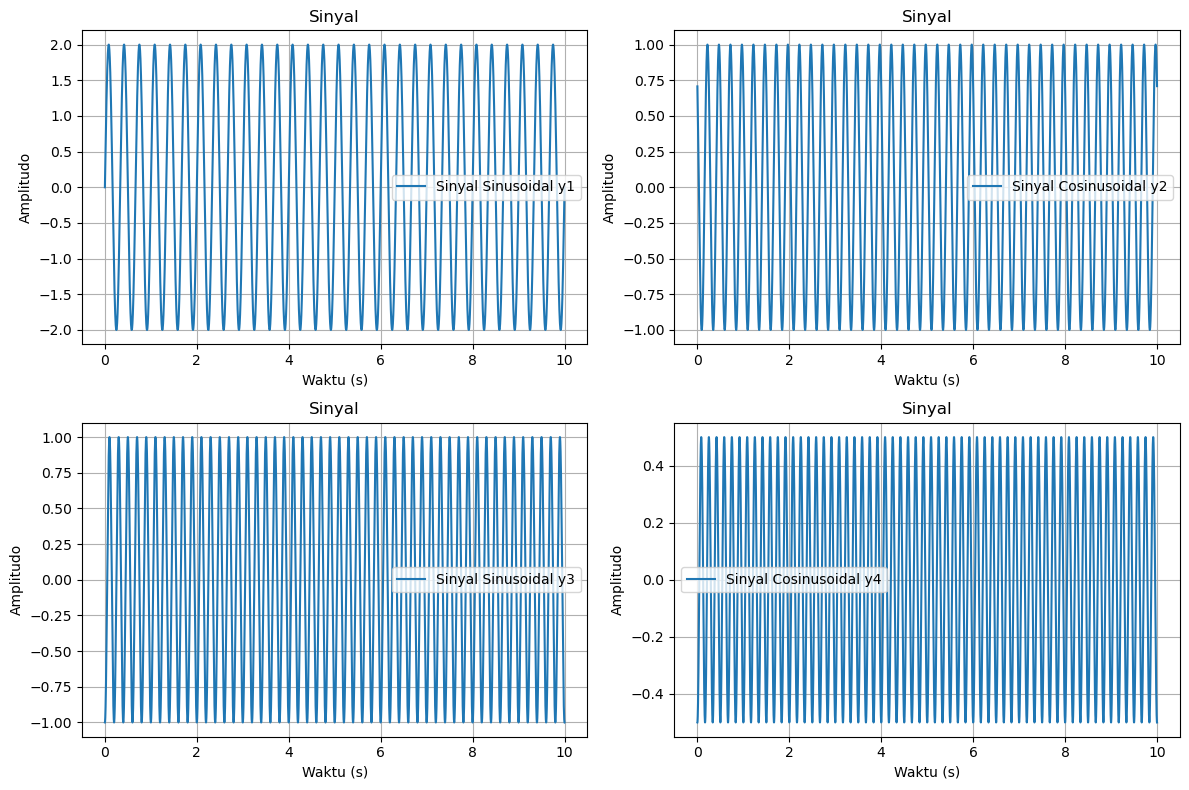

In [12]:
plt.figure(figsize=(12, 8)) # ukuran plot

# Plot y1
plt.subplot(2, 2, 1)
plt.plot(sumbu_waktu, y1, label='Sinyal Sinusoidal y1')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

# Plot y2
plt.subplot(2, 2, 2)
plt.plot(sumbu_waktu, y2, label='Sinyal Cosinusoidal y2')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

# Plot y3
plt.subplot(2, 2, 3)
plt.plot(sumbu_waktu, y3, label='Sinyal Sinusoidal y3')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

# Plot y4
plt.subplot(2, 2, 4)
plt.plot(sumbu_waktu, y4, label='Sinyal Cosinusoidal y4')
plt.title('Sinyal')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()